## Neisseria Gonorrhoeae Figures
This notebook will contain figures generated from data from my 4th year master's project. I am analysing whole-genome sequence data of Neisseria Gonorrhoea from South Africa: their genomes will be characterised; anti-microbial resistance determinants will be identified; genomes will be compared.

### An exploration of my South African data

In [158]:
#pip install pandas
import pandas as pd

my_mlst: pd.DataFrame = pd.read_csv("Data/mydata_mlst.csv", sep = ",", header = "infer")

my_mlst.head()

my_mlst.ST = my_mlst.ST.astype(str)
my_mlst.shape

my_ngstar: pd.DataFrame = pd.read_csv("Data/mydata_ngstar.csv", sep = ",", header = "infer")

my_ngstar.head()

my_ngstar.ST = my_ngstar.ST.astype(str)
my_ngstar.shape

(110, 3)

/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/357874325.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/357874325.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/357874325.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


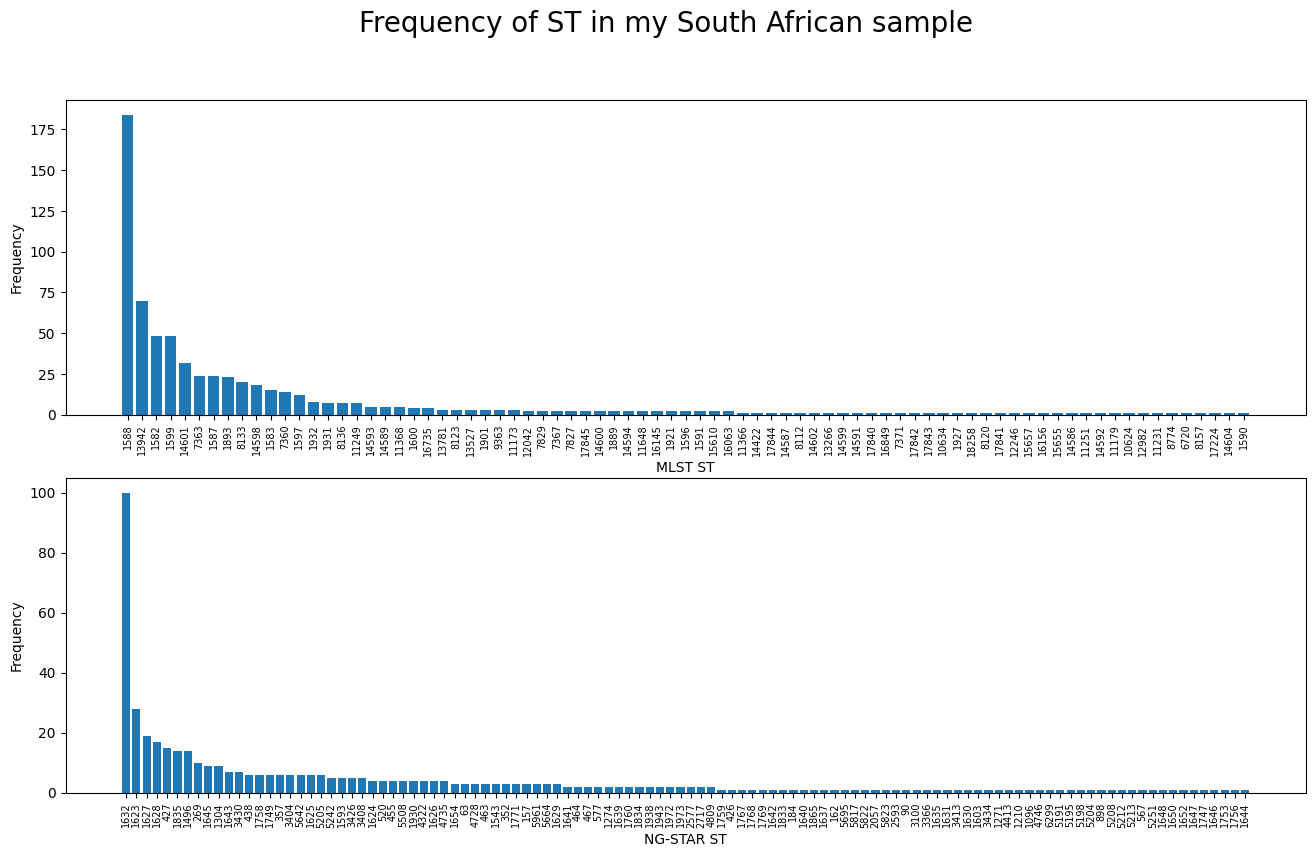

In [159]:
#!pip install matplotlib
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (16,9))

ax[0].bar(x = my_mlst.ST, height = my_mlst.Frequency)

ax[0].set_xticklabels(my_mlst.ST, rotation = 90, fontsize = 7)
ax[0].set_xlabel("MLST ST")
ax[0].set_ylabel("Frequency")

ax[1].bar(x = my_ngstar.ST, height = my_ngstar.Frequency)

ax[1].set_xticklabels(my_ngstar.ST, rotation = 90, fontsize = 7)
ax[1].set_xlabel("NG-STAR ST")
ax[1].set_ylabel("Frequency")

fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

fig.show()


/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/3591347215.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)
/var/folders/k6/5ss4glwd68qb_lbqnx9mjnym0000gn/T/ipykernel_3650/3591347215.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)


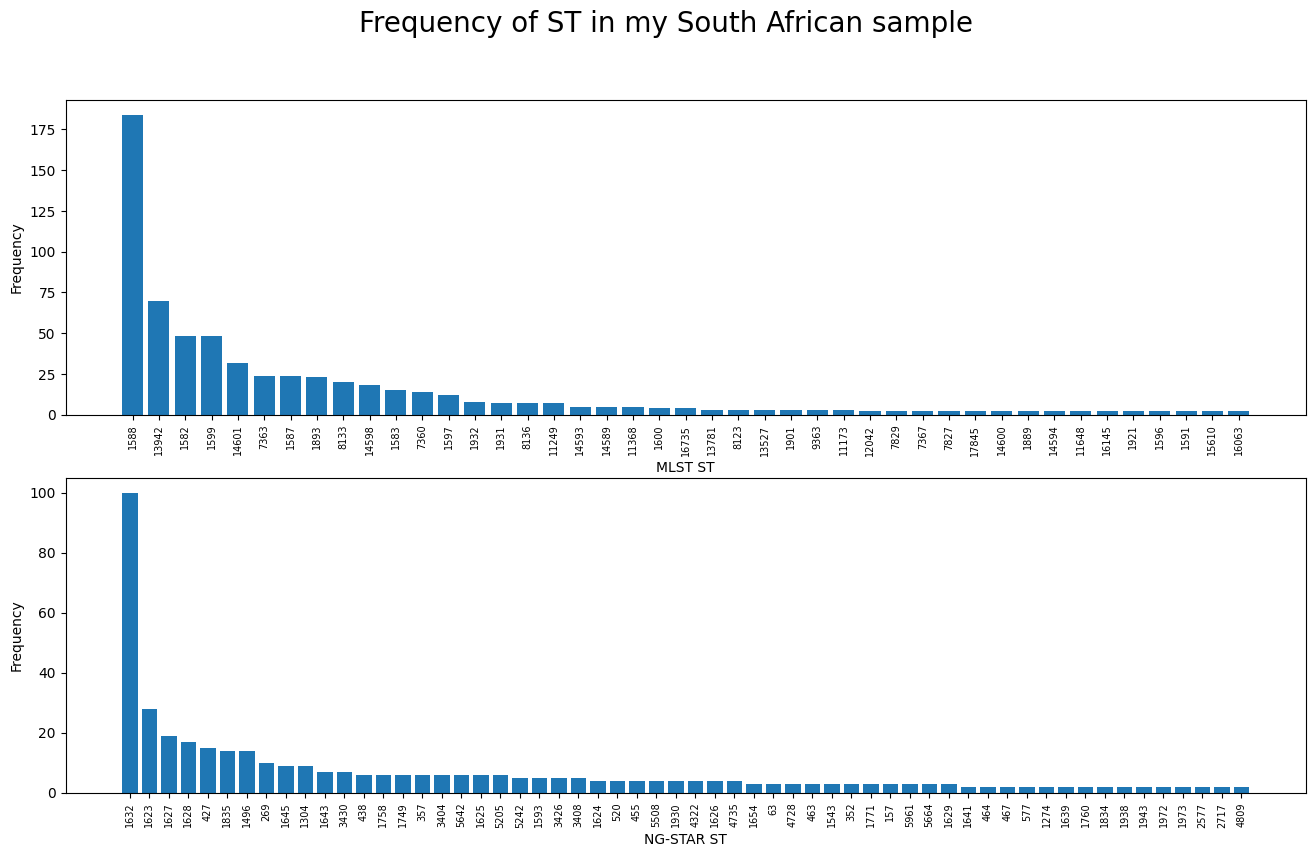

In [160]:
my_mlst2: pd.DataFrame =  my_mlst[my_mlst.Frequency != 1]

my_ngstar2: pd.DataFrame = my_ngstar[my_ngstar.Frequency != 1]

fig, ax = plt.subplots(2,1, figsize = (16,9))

ax[0].bar(x = my_mlst2.ST, height = my_mlst2.Frequency)

ax[0].set_xticklabels(my_mlst2.ST, rotation = 90, fontsize = 7)
ax[0].set_xlabel("MLST ST")
ax[0].set_ylabel("Frequency")

ax[1].bar(x = my_ngstar2.ST, height = my_ngstar2.Frequency)

ax[1].set_xticklabels(my_ngstar2.ST, rotation = 90, fontsize = 7)
ax[1].set_xlabel("NG-STAR ST")
ax[1].set_ylabel("Frequency")

fig.suptitle("Frequency of ST in my South African sample", fontsize = 20)

plt.show()


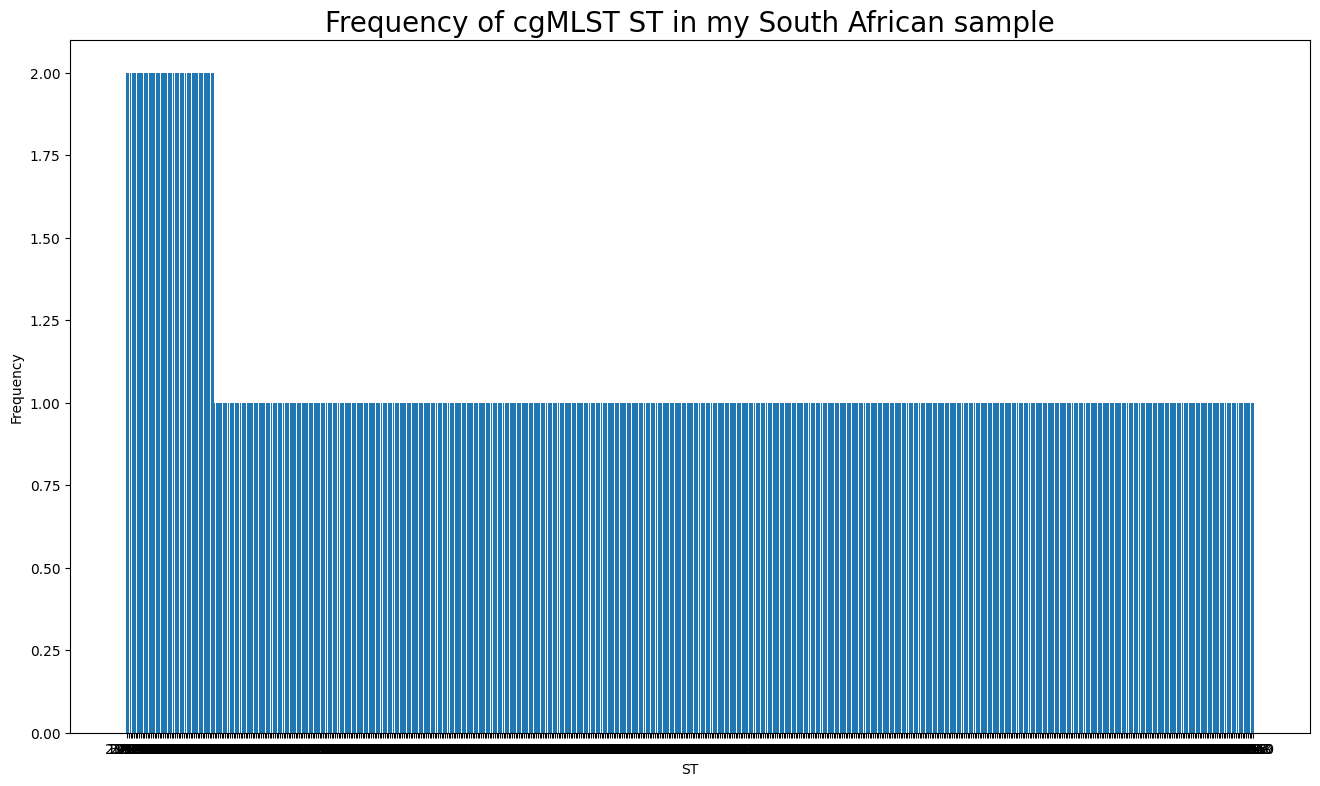

In [174]:
my_cgmlst: pd.DataFrame = pd.read_csv("Data/mydata_cgmlst.csv", sep = ",", header = "infer")

my_cgmlst.head()

test = my_cgmlst.groupby(my_cgmlst.Frequency).Frequency.count()
test

my_cgmlst.cgST = my_cgmlst.cgST.astype(str)

fig = plt.figure(figsize = (16,9))

plt.bar(x = my_cgmlst.cgST, height = my_cgmlst.Frequency)

plt.title("Frequency of cgMLST ST in my South African sample", fontsize = 20)
plt.xlabel("ST")
plt.ylabel("Frequency")

plt.show()

In [161]:
my_amr: pd.DataFrame = pd.read_csv("Data/mydata_amr_prof.csv", sep = ",", header = "infer")

my_amr.head()

my_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)

my_amr.head()

my_azi = my_amr.azi_sign.dropna(axis = 0, how = "any")
my_cef = my_amr.cef_sir.dropna(axis = 0, how = "any")
my_ceftri = my_amr.ceftri_sir.dropna(axis = 0, how = "any")
my_cipro = my_amr.cipro_sir.dropna(axis = 0, how = "any")

amr_azi = my_azi.groupby(my_azi).count()
print(amr_azi)

amr_cef = my_cef.groupby(my_cef).count()
print(amr_cef)

amr_ceftri = my_ceftri.groupby(my_ceftri).count()
print(amr_ceftri)

amr_cipro = my_cipro.groupby(my_cipro).count()
print(amr_cipro)


azi_sign
=    214
>      4
Name: azi_sign, dtype: int64
cef_sir
S    340
Name: cef_sir, dtype: int64
ceftri_sir
S    338
Name: ceftri_sir, dtype: int64
cipro_sir
R    214
S     60
Name: cipro_sir, dtype: int64


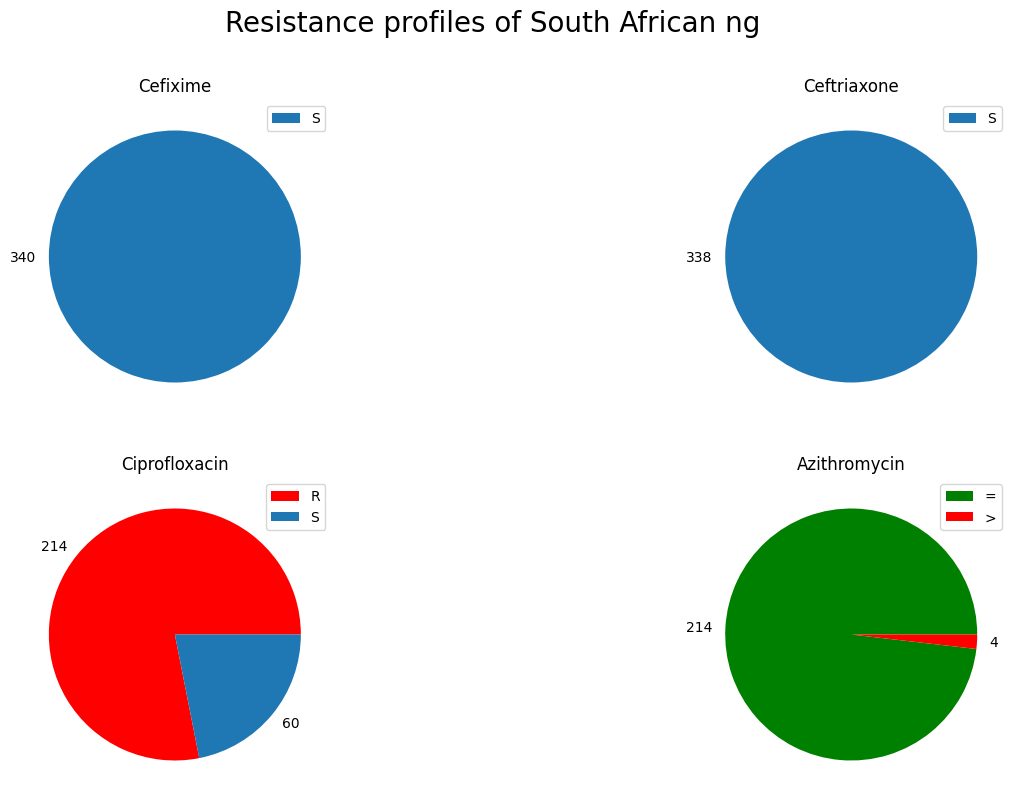

In [185]:
fig, ax = plt.subplots(2,2, figsize = (16,9))

ax[0,0].pie(amr_cef, labels = amr_cef)
ax[0,0].set_title("Cefixime")
ax[0,0].legend(amr_cef.keys().tolist(), loc = "upper right")

ax[0,1].pie(amr_ceftri, labels = amr_ceftri)
ax[0,1].set_title("Ceftriaxone")
ax[0,1].legend(amr_ceftri.keys().tolist(), loc = "upper right")

ax[1,0].pie(amr_cipro, labels = amr_cipro, colors = ["red", "#1f77b4"])
ax[1,0].set_title("Ciprofloxacin")
ax[1,0].legend(amr_cipro.keys().tolist(), loc = "upper right")

ax[1,1].pie(amr_azi, labels = amr_azi, colors = ["green", "red"])
ax[1,1].set_title("Azithromycin")
ax[1,1].legend(amr_azi.keys().tolist(), loc = "upper right")

fig.suptitle("Resistance profiles of South African ng", fontsize = 20)

plt.show()

azi_sign
=    307
>      4
Name: azi_sign, dtype: int64
cef_sir
S    433
Name: cef_sir, dtype: int64
ceftri_sir
S    431
Name: ceftri_sir, dtype: int64
cipro_sir
I      4
R    264
S     99
Name: cipro_sir, dtype: int64


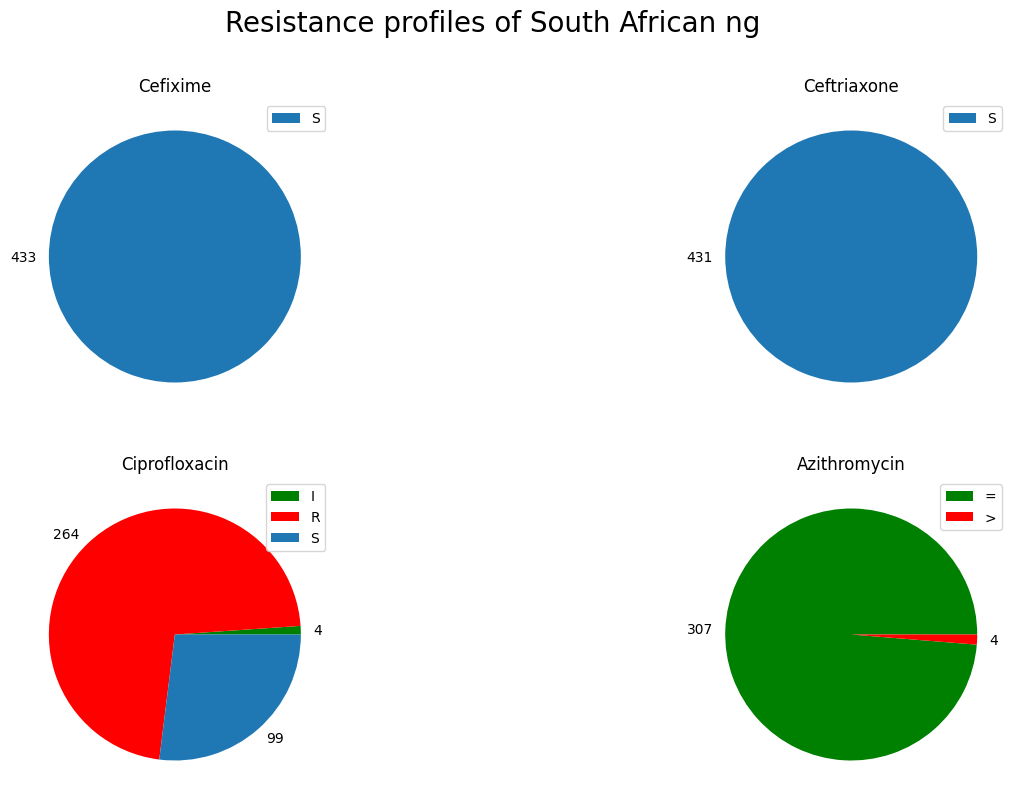

In [186]:
sa_amr: pd.DataFrame = pd.read_csv("Data/sa_amr_prof.csv", sep = ",", header = "infer")

sa_amr.head()

sa_amr.rename(columns = {"azithromycin_mic_sign": "azi_sign", 'cefixime_SIR': "cef_sir", 'ceftriaxone_SIR': "ceftri_sir", "ciprofloxacin_SIR": "cipro_sir"}, inplace = True)

sa_amr.head()

sa_azi = sa_amr.azi_sign.dropna(axis = 0, how = "any")
sa_cef = sa_amr.cef_sir.dropna(axis = 0, how = "any")
sa_ceftri = sa_amr.ceftri_sir.dropna(axis = 0, how = "any")
sa_cipro = sa_amr.cipro_sir.dropna(axis = 0, how = "any")

amr_azi2 = sa_azi.groupby(sa_azi).count()
print(amr_azi2)

amr_cef2 = sa_cef.groupby(sa_cef).count()
print(amr_cef2)

amr_ceftri2 = sa_ceftri.groupby(sa_ceftri).count()
print(amr_ceftri2)

amr_cipro2 = sa_cipro.groupby(sa_cipro).count()
print(amr_cipro2)


fig, ax = plt.subplots(2,2, figsize = (16,9))

ax[0,0].pie(amr_cef2, labels = amr_cef2)
ax[0,0].set_title("Cefixime")
ax[0,0].legend(amr_cef2.keys().tolist(), loc = "upper right")

ax[0,1].pie(amr_ceftri2, labels = amr_ceftri2)
ax[0,1].set_title("Ceftriaxone")
ax[0,1].legend(amr_ceftri2.keys().tolist(), loc = "upper right")

ax[1,0].pie(amr_cipro2, labels = amr_cipro2,  colors = ["green", "red", "#1f77b4"])
ax[1,0].set_title("Ciprofloxacin")
ax[1,0].legend(amr_cipro2.keys().tolist(), loc = "upper right")

ax[1,1].pie(amr_azi2, labels = amr_azi2, colors = ["green", "red"])
ax[1,1].set_title("Azithromycin")
ax[1,1].legend(amr_azi2.keys().tolist(), loc = "upper right")

fig.suptitle("Resistance profiles of South African ng", fontsize = 20)

plt.show()
